In [60]:
#Predict weight gained using calories consumed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
data_calories=pd.read_csv("A:/Data Science/assignments/Linear Regression/calories_consumed.csv")

In [3]:
data_calories.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [4]:
data_calories.shape

(14, 2)

In [5]:
data_calories.dtypes

Weight gained (grams)    int64
Calories Consumed        int64
dtype: object

In [6]:
data_calories.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [24]:
data_calories.corr()

,Weight_gained,Calories_Consumed
Weight_gained,1.000000,0.946991
Calories_Consumed,0.946991,1.000000


In [7]:
data_calories=data_calories.rename(columns={'Weight gained (grams)':'Weight_gained','Calories Consumed':'Calories_Consumed'})

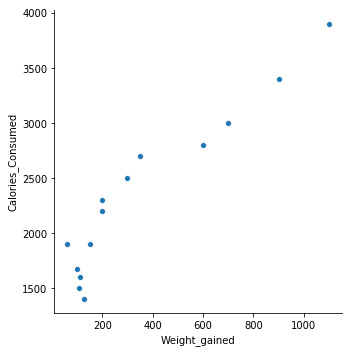

In [8]:
sns.relplot(x='Weight_gained',y='Calories_Consumed',data=data_calories,kind='scatter')

In [9]:
cal_scal=MinMaxScaler()
cal_scaleddata=cal_scal.fit_transform(data_calories)
cal_scaleddata=pd.DataFrame(cal_scaleddata,columns=('Weight_gained','Calories_Consumed'))

In [10]:
cal_scaleddata.head()

,Weight_gained,Calories_Consumed
0,0.044316,0.04
1,0.132948,0.36
2,0.807322,0.80
3,0.132948,0.32
4,0.229287,0.44


In [11]:
x=cal_scaleddata.Weight_gained
y=cal_scaleddata.Calories_Consumed

x=data_calories.Weight_gained
y=data_calories.Calories_Consumed

In [33]:
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [34]:
#Linear Model
cal_m=LinearRegression()
cal_model=cal_m.fit(x,y)

In [35]:
predicted_calories=cal_model.predict(x)
predicted_calories

array([[0.16308735],
       [0.24163412],
       [0.83927255],
       [0.24163412],
       [0.32701104],
       [0.16479489],
       [0.18016274],
       [0.12381397],
       [0.58314179],
       [1.01002638],
       [0.1562572 ],
       [0.19894566],
       [0.36969949],
       [0.66851871]])

In [36]:
print(cal_model.score(x,y))

0.8967919708530553


Text(0,0.5,'Calories_Consumed')

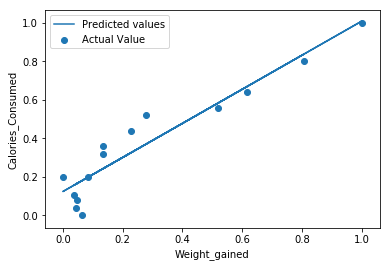

In [39]:
plt.scatter(cal_scaleddata.Weight_gained,cal_scaleddata.Calories_Consumed,label="Actual Value")
plt.plot(x,predicted_calories,label="Predicted values")
plt.legend()
plt.xlabel('Weight_gained')
plt.ylabel('Calories_Consumed')

In [ ]:
#The Accuracy of the model is 89%